<a href="https://colab.research.google.com/github/balamurugan213/Python-for-Data-science/blob/main/4_Regression_book_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connecting to Drive
Download the dataset [here](https://drive.google.com/file/d/10oV6ntGxGNAe4unmZqn-qRBDd9-_OCdK/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/data

Mounted at /gdrive
/gdrive/My Drive/data


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
data = pd.read_csv("amazon_books.csv")
data.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
0,http://www.amazon.com/How-Bartender-Bartending...,How to be a Bartender: Get a Bartending Job Wi...,Dave Allred,9.99,NaN,171.0,"In his revolutionary new book, Dave Allred (Th...",249.0,NaN,English,Enabled,Not Enabled,Enabled,23.0,4.9
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If there’s anyone who can prevent a bar or res...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,http://www.amazon.com/Double-Your-Tips-Jerry-M...,How to Double Your Tips [Kindle Edition],Jerry Minchey,2.99,NaN,36.0,"How to Double Your Tips (For every waitress, w...",98.0,Stony River Media,English,Enabled,Not Enabled,Enabled,6.0,4.5
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6


# Preprocessing


Removing NaN rows

In [ ]:
data = data.dropna()

Converting USD to INR

In [ ]:
# Converting price from USD to INR
inr = 70.72
def usd_to_inr(usd):
  return usd * inr
data["price"] = data["price"].apply(usd_to_inr)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32571 entries, 1 to 49193
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               32571 non-null  object 
 1   title             32571 non-null  object 
 2   author            32571 non-null  object 
 3   price             32571 non-null  float64
 4   save              32571 non-null  float64
 5   pages             32571 non-null  float64
 6   description       32571 non-null  object 
 7   size              32571 non-null  float64
 8   publisher         32571 non-null  object 
 9   language          32571 non-null  object 
 10  text_to_speech    32571 non-null  object 
 11  x_ray             32571 non-null  object 
 12  lending           32571 non-null  object 
 13  customer_reviews  32571 non-null  float64
 14  stars             32571 non-null  float64
dtypes: float64(6), object(9)
memory usage: 4.0+ MB


Correlation Between Columns

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,save,pages,size,customer_reviews,stars
price,1.000000,0.489153,0.233525,0.162954,-0.056055,0.014894
save,0.489153,1.000000,0.184676,0.154055,-0.046905,0.023815
pages,0.233525,0.184676,1.000000,0.089886,0.096139,-0.038571
size,0.162954,0.154055,0.089886,1.000000,0.011519,0.013122
customer_reviews,-0.056055,-0.046905,0.096139,0.011519,1.000000,-0.019341
stars,0.014894,0.023815,-0.038571,0.013122,-0.019341,1.000000


<Axes: xlabel='pages', ylabel='price'>

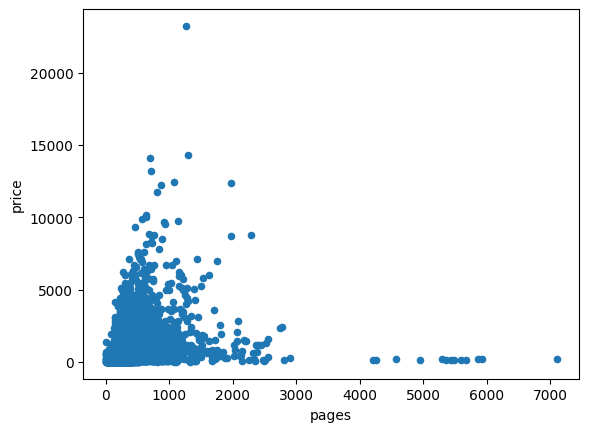

In [ ]:
data.plot(y="price",x="pages",kind="scatter")

+ve correlation between number of pages and the price. Let us build a simple linear regressor that takes in number of pages and outputs the price of the book.

# Regression

In [ ]:
def train(model,X,y):
  return model.fit(X, y)

def predict(model,X):
  X = [[X]]
  return model.predict(X)[0][0]

In [ ]:
y = data[["price"]]
X = data[["pages"]]
model = LinearRegression()
reg = train(model,X.values,y)

Predicting the cost of a book based on number of pages

In [ ]:
predict(model,500)

761.5090237560057

In [ ]:
predict(model,220)

572.607469195498

### Testing
#### Dividing data into testing data and Training data



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[["pages"]], data[["price"]], test_size=0.2,random_state=42)
model = LinearRegression()
reg = train(model,X_train,y_train)
predictions = reg.predict(X_test)
predictions_t = reg.predict(X_train)

## Why Root mean square ?
The root-mean-square error (RMSE) is a frequently used measure of the differences between acutal values and predicted values. The RMSE for your training and your test sets should be very similar if you have built a good model. If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data.


In [ ]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, predictions_t)))
print('Root Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error for train set: 583.0424607602409
Root Mean Squared Error for test set: 499.5207092790631
